In [22]:
import sys
import os
import glob as gb
sys.path.append('/home/cbenitez/')
import MTmp as mt
import matplotlib.pyplot as plt
import numpy as np
import oort_cons as oc

In [38]:
reload(oc)

<module 'oort_cons' from '/home/cbenitez/oort_cons.py'>

In [137]:
R0 = 8
N = 120
rc = .2
A,B = 13.55037486116183, -13.938877070529985
oo = [A,B,0.,0.]

In [138]:
LSRs =  [np.append(np.array([R0,0.,0.]),mt.vel_circ(np.array([R0,0.,0.]),mt.force_T))]

In [139]:
ccgalac = np.array([[1. for i in range(N)],np.linspace(0.,1.-1./N,N),np.zeros(N)]).T*np.array([rc,2*np.pi,0.]) #espaciadas uniforme
cc = [oc.cgalac2ccart(c,LSRs[0][:3:]) for c in ccgalac]
vvOCr = np.array([oc.vr_model(c,np.array(oo))*mt.C.km.express(mt.C.kpc) for c in ccgalac])
vvOCl = np.array([oc.vell_model(c,np.array(oo))*mt.C.km.express(mt.C.kpc) for c in ccgalac])
vvOCb = np.array([oc.vb_model(c,np.array(oo))*mt.C.km.express(mt.C.kpc) for c in ccgalac])
vvOCgalac = np.array([[vvOCr[i],vvOCl[i],vvOCb[i]] for i in range(N)])
vvOC = np.array([oc.vgalacOC2vcart(ccgalac[i],LSRs[0][:3:],vvOCgalac[i],LSRs[0][3::]) for i in range(N)])

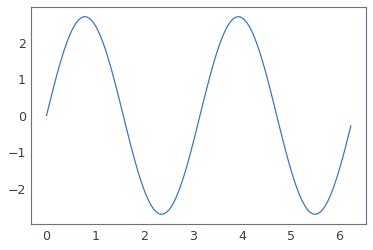

In [140]:
plt.plot(ccgalac[:,1],vvOCr*mt.C.kpc.express(mt.C.km))

In [141]:
vvCirc = np.array([mt.vel_circ(c,force=mt.force_T) for c in cc])

(array([  0.,   0.,   0.,   0.,   0., 120.,   0.,   0.,   0.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

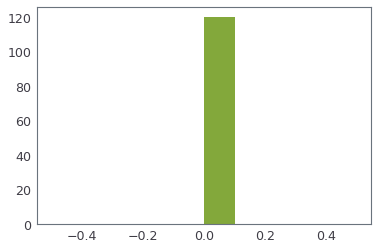

In [142]:
plt.hist(vvCirc[:,2])
plt.hist(vvOC[:,2])

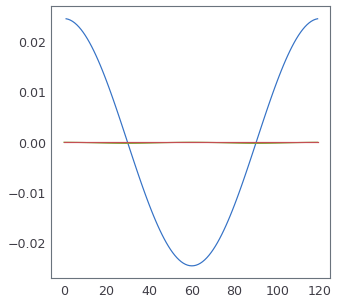

In [143]:
plt.figure(figsize=(5,5))
plt.plot((vvCirc[:,0]-vvOC[:,0])/vvCirc[:,0])
plt.plot((vvCirc[:,1]-vvOC[:,1])/vvCirc[:,1])
plt.plot((vvCirc[:,2]-vvOC[:,2]))
#plt.plot(np.linspace(-15,15),np.linspace(-15,15),c='k')

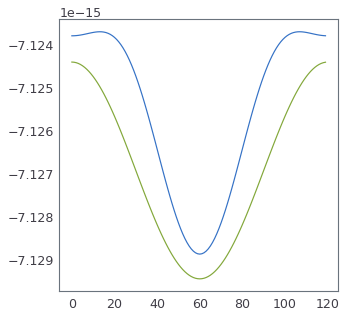

In [144]:
plt.figure(figsize=(5,5))
plt.plot(vvCirc[:,1])
plt.plot(vvOC[:,1])